<a href="https://colab.research.google.com/github/Sugoto/Hinglish-Transliteration/blob/main/Indic_Language_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Loading and preprocessing data

In [ ]:
data = pd.read_csv('sentences.csv')

train_data = data.sample(frac=0.9, random_state=42)
test_data = data.drop(train_data.index)

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['sentence'])
X_test = vectorizer.transform(test_data['sentence'])

y_train = train_data['language']
y_test = test_data['language']

## Training and evaluating the SVM model 

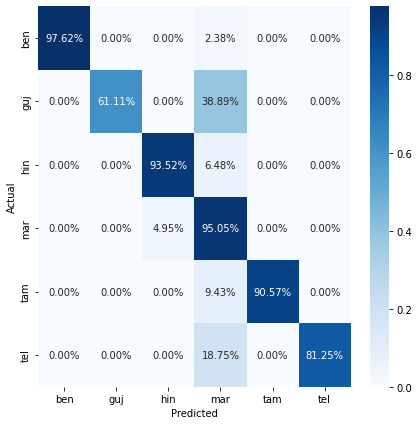

K-fold Accuracy: 88.7902% (+/- 31.3131)
Best accuracy: 92.1717%


In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)
X = vectorizer.transform(data['sentence'])
y = data['language']
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

skf = StratifiedKFold(n_splits=10)

scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

print('K-fold Accuracy: {:.4f}% (+/- {:.4f})'.format(sum(scores) / len(scores) * 100, 2 * (max(scores) - min(scores)) * 100))
best_score = max(scores)
print('Best accuracy: {:.4f}%'.format(best_score * 100))

## Using the trained model to predict the language of each word in a sentence entered by the user

In [ ]:
new_sentence = input("\nEnter a sentence: ")
new_words = new_sentence.split()

label_counts = {'eng': 0, 'ben': 0, 'hin': 0, 'tam': 0, 'tel': 0, 'guj': 0, 'mar': 0}
total_words = 0

for word in new_words:
    if all(ord(c) < 128 for c in word):
        label = 'eng'
    else:
        word_features = vectorizer.transform([word])
        label = clf.predict(word_features)[0]

    label_counts[label] += 1
    total_words += 1
    print(word, ':', label)

print('\nTotal words:', total_words)
for label, count in label_counts.items():
    if count > 0:
        print(label, ':', count)


Enter a sentence: l
l : eng

Total words: 1
eng : 1
